In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,8]

In [3]:
foo = r'E:/RESEAERCH/FEEDS/ENTE/KAMPALA.csv'
#foo = r'E:/RESEAERCH/FEEDS/ENTE/methcombine.csv'

In [4]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv(foo)

In [5]:
print(df.head())

         Time (UTC)  Barometric Pressure (mbar)  Temperature (degrees F)  \
0  15/10/2017 15:00                     1005.84                     77.0   
1  16/10/2017 15:00                     1005.28                     81.5   
2  17/10/2017 06:00                     1008.85                     72.3   
3  17/10/2017 09:00                     1007.85                     80.6   
4  17/10/2017 12:00                     1004.16                     82.0   

   Dewpoint (degrees F)  Relative Humidity (%)  Wind speed (mph)  \
0                  65.7                   68.0                 2   
1                  66.2                   59.0                 0   
2                  67.3                   84.0                 3   
3                  67.1                   63.0                 3   
4                  68.0                   62.0                 0   

   Wind direction (degrees)  Analysis Barometric Pressure (mbar)  \
0                       200                                  NaN  

In [6]:
df = df.drop(["Analysis Barometric Pressure (mbar)","Analysis Temperature (degrees F)","Analysis Dewpoint (degrees F)","Analysis Relative Humidity (%)","Analysis Wind speed (mph)","Analysis Wind direction (degrees)"], axis=1)


In [7]:
df.head()

,Time (UTC),Barometric Pressure (mbar),Temperature (degrees F),Dewpoint (degrees F),Relative Humidity (%),Wind speed (mph),Wind direction (degrees)
0,15/10/2017 15:00,1005.84,77.0,65.7,68.0,2,200
1,16/10/2017 15:00,1005.28,81.5,66.2,59.0,0,0
2,17/10/2017 06:00,1008.85,72.3,67.3,84.0,3,290
3,17/10/2017 09:00,1007.85,80.6,67.1,63.0,3,50
4,17/10/2017 12:00,1004.16,82.0,68.0,62.0,0,0


In [8]:
df.describe()

,Barometric Pressure (mbar),Temperature (degrees F),Dewpoint (degrees F),Relative Humidity (%),Wind speed (mph),Wind direction (degrees)
count,626.000000,763.000000,759.000000,759.000000,763.000000,763.000000
mean,1006.256677,75.195020,64.995520,71.421607,2.425950,137.038008
std,2.465827,5.067109,5.315059,15.123549,2.624977,107.607639
min,999.470000,62.200000,52.300000,31.000000,0.000000,0.000000
25%,1004.187500,71.200000,63.900000,61.500000,0.000000,0.000000
50%,1006.400000,75.900000,65.500000,70.000000,2.000000,160.000000
75%,1008.180000,78.800000,66.600000,83.000000,4.000000,180.000000
max,1011.650000,88.700000,190.000000,100.000000,50.000000,360.000000


In [9]:
df.dtypes

Time (UTC)                     object
Barometric Pressure (mbar)    float64
Temperature (degrees F)       float64
Dewpoint (degrees F)          float64
Relative Humidity (%)         float64
Wind speed (mph)                int64
Wind direction (degrees)        int64
dtype: object

In [18]:
#forward fill
df = df.ffill()

In [10]:
df.describe()

,Barometric Pressure (mbar),Temperature (degrees F),Dewpoint (degrees F),Relative Humidity (%),Wind speed (mph),Wind direction (degrees)
count,626.000000,763.000000,759.000000,759.000000,763.000000,763.000000
mean,1006.256677,75.195020,64.995520,71.421607,2.425950,137.038008
std,2.465827,5.067109,5.315059,15.123549,2.624977,107.607639
min,999.470000,62.200000,52.300000,31.000000,0.000000,0.000000
25%,1004.187500,71.200000,63.900000,61.500000,0.000000,0.000000
50%,1006.400000,75.900000,65.500000,70.000000,2.000000,160.000000
75%,1008.180000,78.800000,66.600000,83.000000,4.000000,180.000000
max,1011.650000,88.700000,190.000000,100.000000,50.000000,360.000000


In [11]:
from datetime import datetime

df = df.rename(columns={"Time (UTC)": "Date"})
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.head()

,Date,Barometric Pressure (mbar),Temperature (degrees F),Dewpoint (degrees F),Relative Humidity (%),Wind speed (mph),Wind direction (degrees)
0,2017-10-15 15:00:00,1005.84,77.0,65.7,68.0,2,200
1,2017-10-16 15:00:00,1005.28,81.5,66.2,59.0,0,0
2,2017-10-17 06:00:00,1008.85,72.3,67.3,84.0,3,290
3,2017-10-17 09:00:00,1007.85,80.6,67.1,63.0,3,50
4,2017-10-17 12:00:00,1004.16,82.0,68.0,62.0,0,0


In [14]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Barometric Pressure (mbar)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlys = monthly.dropna(axis=0)
print monthlys.head()
print monthlys.shape
#monthlys.to_csv('E:/RESEAERCH/FEEDS/ENTE/PRESSURE1.csv')

Date
2017-01-11    1005.5600
2017-01-12    1006.1175
2017-02-11    1003.4900
2017-02-12    1005.7825
2017-03-11    1002.6000
Name: Barometric Pressure (mbar), dtype: float64
(332,)


In [15]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Temperature (degrees F)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysT = monthly.dropna(axis=0)
print monthlysT.head()
print monthlysT.shape

#monthlysT.to_csv('E:/RESEAERCH/FEEDS/ENTE/TEMP1.csv')

Date
2017-01-11    78.600
2017-01-12    75.525
2017-02-11    78.800
2017-02-12    77.100
2017-03-11    78.400
Name: Temperature (degrees F), dtype: float64
(332,)


In [16]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Dewpoint (degrees F)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysD = monthly.dropna(axis=0)
print monthlysD.head()
print monthlysD.shape

#monthlysD.to_csv('E:/RESEAERCH/FEEDS/ENTE/DEWPOINT1.csv')

Date
2017-01-11    65.1
2017-01-12    64.6
2017-02-11    63.1
2017-02-12    63.8
2017-03-11    65.5
Name: Dewpoint (degrees F), dtype: float64
(332,)


In [17]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Relative Humidity (%)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysH = monthly.dropna(axis=0)
print monthlysH.head()
print monthlysH.shape

#monthlysH.to_csv('E:/RESEAERCH/FEEDS/ENTE/HUM1.csv')

Date
2017-01-11    63.0
2017-01-12    69.0
2017-02-11    58.0
2017-02-12    64.5
2017-03-11    64.0
Name: Relative Humidity (%), dtype: float64
(332,)


In [18]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Wind speed (mph)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysW = monthly.dropna(axis=0)
print monthlysW.head()
print monthlysW.shape

#monthlysW.to_csv('E:/RESEAERCH/FEEDS/ENTE/WINDSP1.csv')

Date
2017-01-11    4.00
2017-01-12    2.75
2017-02-11    2.00
2017-02-12    2.50
2017-03-11    4.00
Name: Wind speed (mph), dtype: float64
(332,)


In [19]:
daily = df.set_index('Date').groupby(pd.Grouper(freq='D'))['Wind direction (degrees)'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlysWD = monthly.dropna(axis=0)
print monthlysWD.head()
print monthlysWD.shape

#monthlysWD.to_csv('E:/RESEAERCH/FEEDS/ENTE/WINDDIR1.csv')

Date
2017-01-11    160.0
2017-01-12    165.0
2017-02-11    180.0
2017-02-12    165.0
2017-03-11    180.0
Name: Wind direction (degrees), dtype: float64
(332,)


In [13]:
PR =r'E:/RESEAERCH/FEEDS/ENTE/PRESSURE1.csv'
DT = r'E:/RESEAERCH/FEEDS/ENTE/DEWPOINT1.csv'
H = r'E:/RESEAERCH/FEEDS/ENTE/HUM1.csv'
WS = r'E:/RESEAERCH/FEEDS/ENTE/WINDSP1.csv'
WD = r'E:/RESEAERCH/FEEDS/ENTE/WINDDIR1.csv'
TP =r'E:/RESEAERCH/FEEDS/ENTE/TEMP1.csv'

In [14]:
from datetime import datetime

# Name column

# TEMPRESURE

In [15]:
tp = pd.read_csv(TP)

tp.columns = ['Date', 'Temperature (degrees F)']
#print tp.head()
tp['Date'] = pd.to_datetime(tp['Date'])
print tp.head()

        Date  Temperature (degrees F)
0 2017-01-12                   75.525
1 2017-02-11                   78.800
2 2017-02-12                   77.100
3 2017-03-11                   78.400
4 2017-03-12                   75.600


# Pressure 

In [16]:
pr = pd.read_csv(PR)
pr.columns = ['Date', 'Barometric Pressure (mbar)']
#print pr.head()
pr['Date'] = pd.to_datetime(pr['Date'])
print pr.head()

        Date  Barometric Pressure (mbar)
0 2017-01-12                   1006.1175
1 2017-02-11                   1003.4900
2 2017-02-12                   1005.7825
3 2017-03-11                   1002.6000
4 2017-03-12                   1006.7575


# Wind direction (degrees)

In [17]:
wd = pd.read_csv(WD)
wd.columns = ['Date', 'Wind direction (degrees)']
#print wd.head()
wd['Date'] = pd.to_datetime(wd['Date'])
print wd.head()

        Date  Wind direction (degrees)
0 2017-01-12                     165.0
1 2017-02-11                     180.0
2 2017-02-12                     165.0
3 2017-03-11                     180.0
4 2017-03-12                     152.5


# Relative Humidity (%)

In [18]:
h = pd.read_csv(H)
h.columns = ['Date', 'Relative Humidity (%)']
#print h.head()
h['Date'] = pd.to_datetime(h['Date'])
print h.head()

        Date  Relative Humidity (%)
0 2017-01-12                   69.0
1 2017-02-11                   58.0
2 2017-02-12                   64.5
3 2017-03-11                   64.0
4 2017-03-12                   72.0


# Wind speed (mph)

In [19]:
ws = pd.read_csv(WS)
ws.columns = ['Date', 'Wind speed (mph)']
#print ws.head()
ws['Date'] = pd.to_datetime(ws['Date'])
print ws.head()

        Date  Wind speed (mph)
0 2017-01-12              2.75
1 2017-02-11              2.00
2 2017-02-12              2.50
3 2017-03-11              4.00
4 2017-03-12              3.00


# Dewpoint (degrees F)

In [20]:
dt = pd.read_csv(DT)
dt.columns = ['Date', 'Dewpoint (degrees F)']
#print dt.head()
dt['Date'] = pd.to_datetime(dt['Date'])
print dt.head()

        Date  Dewpoint (degrees F)
0 2017-01-12                  64.6
1 2017-02-11                  63.1
2 2017-02-12                  63.8
3 2017-03-11                  65.5
4 2017-03-12                  65.8


In [21]:
merge1 = pr.merge(dt,on='Date') 
merge2 = tp.merge(merge1,on='Date')
merge3 = ws.merge(merge2,on ='Date')
merge4 = h.merge(merge3,on ='Date')
merge5 = wd.merge(merge4,on ='Date')

In [22]:
merge5.head()

,Date,Wind direction (degrees),Relative Humidity (%),Wind speed (mph),Temperature (degrees F),Barometric Pressure (mbar),Dewpoint (degrees F)
0,2017-01-12,165.0,69.0,2.75,75.525,1006.1175,64.6
1,2017-02-11,180.0,58.0,2.00,78.800,1003.4900,63.1
2,2017-02-12,165.0,64.5,2.50,77.100,1005.7825,63.8
3,2017-03-11,180.0,64.0,4.00,78.400,1002.6000,65.5
4,2017-03-12,152.5,72.0,3.00,75.600,1006.7575,65.8


In [24]:
#foo1 = r'E:/RESEAERCH/FEEDS/makidye/feedsD.csv'
foo1 = r'E:/RESEAERCH/FEEDS/makidye/feeds.csv'

In [39]:
# Let's first load the data and take a look at what we have.
df11 = pd.read_csv(foo1)
print df11.head()

                created_at  entry_id  field1  field2  field3  field4  \
0  2017-06-30 21:54:28 UTC         1   17.36   23.44   42.72    1.39   
1  2017-06-30 21:55:29 UTC         2   17.51   23.75   42.05    1.39   
2  2017-06-30 21:56:35 UTC         3   17.28   23.30   50.69    1.39   
3  2017-06-30 21:57:34 UTC         4   16.82   22.56   36.48    1.39   
4  2017-06-30 21:58:33 UTC         5   16.91   22.57   38.55    1.39   

        field5       field6  field7  
0     0.000000     0.000000     NaN  
1  1000.000000  1000.000000     NaN  
2     0.358032    32.584686     NaN  
3     0.357840    32.584671     NaN  
4     0.357840    32.584671     NaN  


In [63]:
#df1 = df1.drop(["entry_id","field1","field3","field4","field5","field6","field7"], axis=1)
df11.describe()

,entry_id,field1,field2,field3,field4,field5,field6,field7
count,390857.00000,390857.000000,390857.000000,390857.000000,390857.000000,390857.000000,390857.000000,376744.000000
mean,195429.00000,11.320167,16.598077,31.226592,1.388625,39.406473,70.373011,4.539677
std,112830.84142,24.249497,39.702602,49.026679,0.037493,193.767964,187.524088,0.283820
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.700000
25%,97715.00000,3.790000,5.640000,12.580000,1.390000,0.331978,32.569897,4.300000
50%,195429.00000,6.930000,10.160000,22.220000,1.390000,0.332233,32.569935,4.470000
75%,293143.00000,12.920000,18.720000,38.300000,1.390000,0.332274,32.600323,4.830000
max,390857.00000,2441.510000,3717.700000,6557.410000,1.710000,1000.000000,1000.000000,5.000000


In [27]:
#print df1.head()

                created_at  field2
0  2017-06-30 21:54:28 UTC   23.44
1  2017-06-30 21:55:29 UTC   23.75
2  2017-06-30 21:56:35 UTC   23.30
3  2017-06-30 21:57:34 UTC   22.56
4  2017-06-30 21:58:33 UTC   22.57


In [28]:
#df1 = df1.rename(columns={"created_at": "Date"})
#print df1.head()

                      Date  field2
0  2017-06-30 21:54:28 UTC   23.44
1  2017-06-30 21:55:29 UTC   23.75
2  2017-06-30 21:56:35 UTC   23.30
3  2017-06-30 21:57:34 UTC   22.56
4  2017-06-30 21:58:33 UTC   22.57


In [29]:
#from datetime import datetime

#df1['Date'] = pd.to_datetime(df1['Date'])
#print df1.head()

                 Date  field2
0 2017-06-30 21:54:28   23.44
1 2017-06-30 21:55:29   23.75
2 2017-06-30 21:56:35   23.30
3 2017-06-30 21:57:34   22.56
4 2017-06-30 21:58:33   22.57


In [36]:
'''
daily = df1.set_index('Date').groupby(pd.Grouper(freq='D'))['field2'].mean()
monthly = daily.groupby(pd.Grouper(freq='D')).mean()
#Dropping all Nan values
monthlyss = monthly.dropna(axis=0)
print monthlyss.head()
print monthlyss.shape
#monthlyss.to_csv('E:/RESEAERCH/FEEDS/makidye/feedsALL.csv')
'''

Date
2017-06-30    43.638864
2017-07-01    21.086933
2017-07-02    42.684333
2017-07-03    30.802204
2017-07-04    27.477139
Name: field2, dtype: float64
(381,)


In [35]:
#monthlyss.columns = ['Date', 'Value']
#print monthlyss.head()

Date
2017-06-30    43.638864
2017-07-01    21.086933
2017-07-02    42.684333
2017-07-03    30.802204
2017-07-04    27.477139
Name: field2, dtype: float64


In [40]:
pall=r'E:/RESEAERCH/FEEDS/makidye/feedsALL.csv'
df1 = pd.read_csv(pall)
df1.columns = ['Date', 'Value']
print df1.head()

         Date      Value
0  2017-07-01  21.086933
1  2017-07-02  42.684333
2  2017-07-03  30.802204
3  2017-07-04  27.477139
4  2017-07-05  26.975534


In [65]:
from datetime import datetime

df1['Date'] = pd.to_datetime(df1['Date'])
print df1.head()

        Date      Value
0 2017-07-01  21.086933
1 2017-07-02  42.684333
2 2017-07-03  30.802204
3 2017-07-04  27.477139
4 2017-07-05  26.975534


In [42]:
df1.describe()

,Value
count,380.000000
mean,17.198572
std,16.508220
min,0.498679
25%,8.998194
50%,13.524341
75%,20.041654
max,168.135477


In [43]:
merge = df1.merge(merge5,on='Date')

In [44]:
merge.head()

,Date,Value,Wind direction (degrees),Relative Humidity (%),Wind speed (mph),Temperature (degrees F),Barometric Pressure (mbar),Dewpoint (degrees F)
0,2017-07-12,25.961379,110.000000,87.000000,6.000000,73.000000,1006.280000,69.300000
1,2017-09-11,12.885987,90.000000,71.500000,1.500000,76.650000,1003.715000,66.800000
2,2017-09-12,14.465070,270.000000,65.000000,5.000000,78.100000,1002.260000,65.700000
3,2017-10-11,11.906957,90.000000,82.000000,1.500000,71.700000,1004.945000,65.775000
4,2017-10-12,10.451795,103.333333,73.666667,1.333333,75.433333,1005.316667,66.433333


In [45]:
from datetime import datetime

merge['Date'] = pd.to_datetime(merge['Date'])
print merge.head()

        Date      Value  Wind direction (degrees)  Relative Humidity (%)  \
0 2017-07-12  25.961379                110.000000              87.000000   
1 2017-09-11  12.885987                 90.000000              71.500000   
2 2017-09-12  14.465070                270.000000              65.000000   
3 2017-10-11  11.906957                 90.000000              82.000000   
4 2017-10-12  10.451795                103.333333              73.666667   

   Wind speed (mph)  Temperature (degrees F)  Barometric Pressure (mbar)  \
0          6.000000                73.000000                 1006.280000   
1          1.500000                76.650000                 1003.715000   
2          5.000000                78.100000                 1002.260000   
3          1.500000                71.700000                 1004.945000   
4          1.333333                75.433333                 1005.316667   

   Dewpoint (degrees F)  
0             69.300000  
1             66.800000  
2       

In [46]:
merge.describe()

,Value,Wind direction (degrees),Relative Humidity (%),Wind speed (mph),Temperature (degrees F),Barometric Pressure (mbar),Dewpoint (degrees F)
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,16.277606,135.984848,71.868326,2.307720,75.170635,1006.233770,65.000938
std,15.651951,82.150378,11.871062,1.477480,3.676316,1.932474,2.529918
min,0.498679,0.000000,39.000000,0.000000,65.100000,999.470000,53.600000
25%,8.465451,90.000000,64.875000,1.333333,72.700000,1004.941667,64.216667
50%,12.066148,140.000000,72.000000,2.000000,75.133333,1006.506667,65.550000
75%,19.404278,180.000000,79.500000,3.000000,77.900000,1007.180000,66.562500
max,130.065521,360.000000,100.000000,7.000000,84.000000,1011.255000,70.200000


In [47]:
# Show rows where any cell has a NaN
merge[merge.isnull().any(axis=1)].shape

(0, 8)

In [48]:
merge = merge.rename(columns={"Wind direction (degrees)": "DIR"})
merge = merge.rename(columns={"Temperature (degrees F)": "TEMP"})
merge = merge.rename(columns={"Dewpoint (degrees F)": "DEWP"})
merge = merge.rename(columns={"Wind speed (mph)": "SPD"})
merge = merge.rename(columns={"Relative Humidity (%)": "HUM"})
merge = merge.rename(columns={"Barometric Pressure (mbar)": "PRES"})

In [49]:
#Un named column
#merge = merge.rename(columns={"Unnamed: 0": "id"})

In [50]:
#df2.head()
merge.head()

,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP
0,2017-07-12,25.961379,110.000000,87.000000,6.000000,73.000000,1006.280000,69.300000
1,2017-09-11,12.885987,90.000000,71.500000,1.500000,76.650000,1003.715000,66.800000
2,2017-09-12,14.465070,270.000000,65.000000,5.000000,78.100000,1002.260000,65.700000
3,2017-10-11,11.906957,90.000000,82.000000,1.500000,71.700000,1004.945000,65.775000
4,2017-10-12,10.451795,103.333333,73.666667,1.333333,75.433333,1005.316667,66.433333


In [51]:
from datetime import datetime

merge['Date'] = pd.to_datetime(merge['Date'])
print merge.head()

        Date      Value         DIR        HUM       SPD       TEMP  \
0 2017-07-12  25.961379  110.000000  87.000000  6.000000  73.000000   
1 2017-09-11  12.885987   90.000000  71.500000  1.500000  76.650000   
2 2017-09-12  14.465070  270.000000  65.000000  5.000000  78.100000   
3 2017-10-11  11.906957   90.000000  82.000000  1.500000  71.700000   
4 2017-10-12  10.451795  103.333333  73.666667  1.333333  75.433333   

          PRES       DEWP  
0  1006.280000  69.300000  
1  1003.715000  66.800000  
2  1002.260000  65.700000  
3  1004.945000  65.775000  
4  1005.316667  66.433333  


In [52]:
import datetime as dt
merge['month'] = merge['Date'].dt.month_name()

In [53]:
merge.head()

,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month
0,2017-07-12,25.961379,110.000000,87.000000,6.000000,73.000000,1006.280000,69.300000,July
1,2017-09-11,12.885987,90.000000,71.500000,1.500000,76.650000,1003.715000,66.800000,September
2,2017-09-12,14.465070,270.000000,65.000000,5.000000,78.100000,1002.260000,65.700000,September
3,2017-10-11,11.906957,90.000000,82.000000,1.500000,71.700000,1004.945000,65.775000,October
4,2017-10-12,10.451795,103.333333,73.666667,1.333333,75.433333,1005.316667,66.433333,October


In [54]:
merge['month_cat'] = merge.month.astype("category").cat.codes

In [55]:
merge.tail()

,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat
226,2018-10-14,12.214382,360.0,87.0,2.0,68.90,1007.18,64.9,October,10
227,2018-10-15,17.733886,160.0,84.0,2.0,70.50,1007.18,65.7,October,10
228,2018-10-16,15.885943,135.0,78.0,1.0,73.90,1007.18,66.4,October,10
229,2018-10-17,14.329214,360.0,61.0,4.0,81.00,1007.18,66.4,October,10
230,2018-10-18,9.150698,90.0,68.0,2.0,76.45,1007.18,65.2,October,10


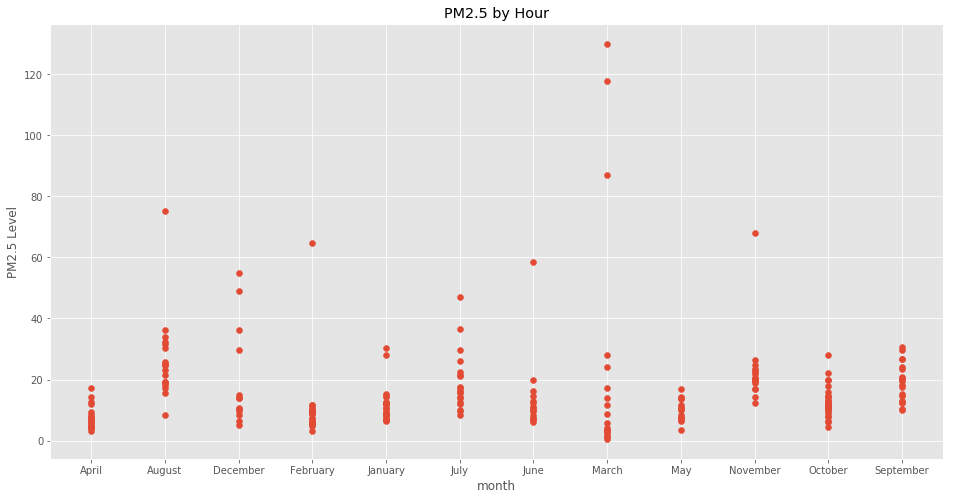

In [56]:
x = merge['month']
y = merge['Value']
plt.scatter(x,y)
plt.xlabel('month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

In [50]:
#merge = merge.drop(merge[merge.Value > 100].index)

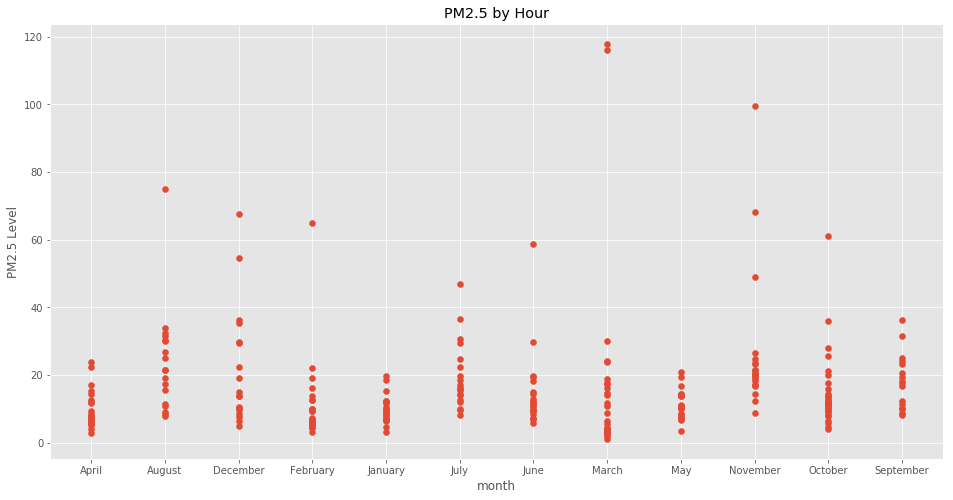

In [51]:
x = merge['month']
y = merge['Value']
plt.scatter(x,y)
plt.xlabel('month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

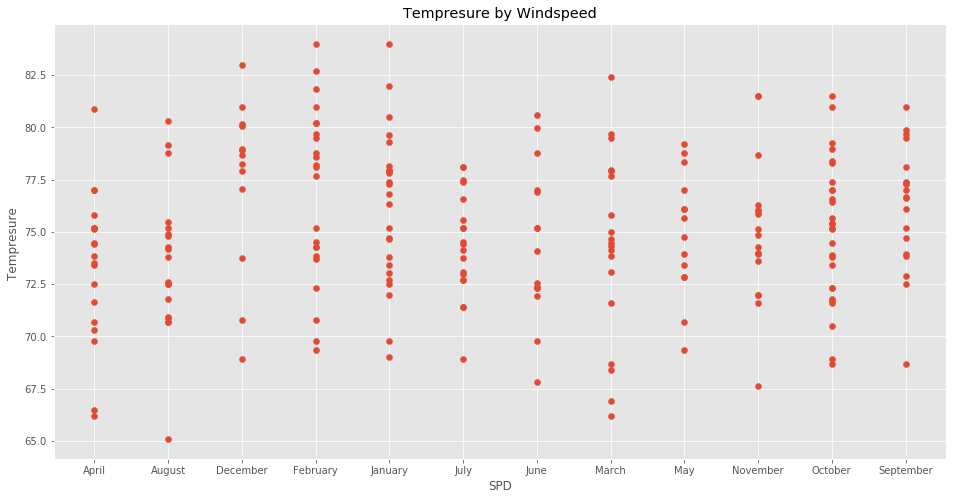

In [57]:
x = merge['month']
y = merge['TEMP']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('Tempresure ')
plt.title('Tempresure by Windspeed')
plt.show()

### Determinations made from visualizations
- It is clear that at higher windspeed AQI is lower. Wind speed is possibly a good predictor.
- Wind direction is given in a 360 degree arc, but variable wind directions are given as 990.
- Hours are given on a range from 0-24

== Next Steps ==
- Remove unneeded features (those that will be unavailable as inputs) - cleaning
- Find which features have NaNs, determine what to do with them - cleaning


# Clean Data

# Create canonical date feature

In [58]:
from datetime import datetime
def time_series(start, end):
    time_series_df = merge[['Date', 'TEMP']][(merge['Date'] >= start) & (merge['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.TEMP
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();
#df['Date (LST)'] = pd.to_datetime(df['Date (LST)'])
# = df.rename(columns={"Date (LST)": "Date"})

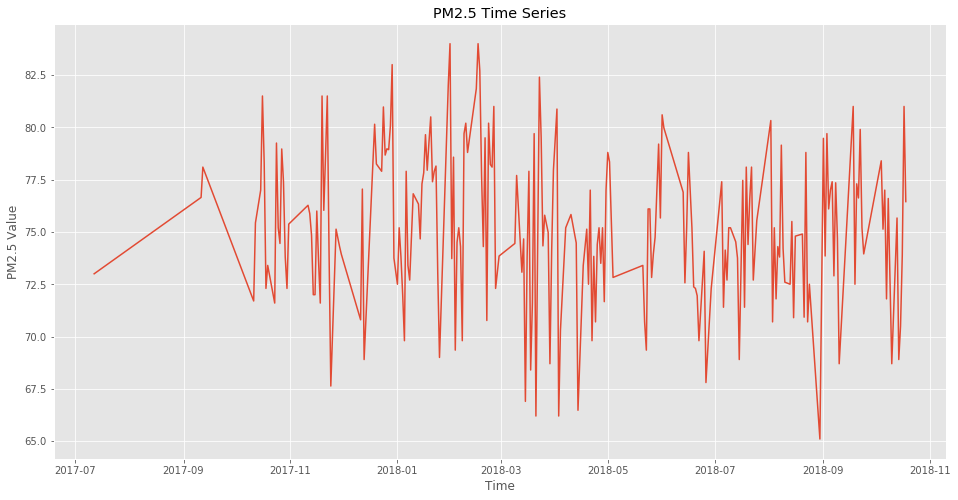

In [59]:
time_series('2017-06-10','2018-10-21')

In [62]:
merge.corr()

,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month_cat
Value,1.000000,0.001326,0.129535,-0.016502,-0.128150,0.126520,0.081049,0.051300
DIR,0.001326,1.000000,-0.276343,0.679825,0.232262,-0.072559,-0.223519,0.007487
HUM,0.129535,-0.276343,1.000000,-0.367051,-0.907506,0.292126,0.716986,-0.023196
SPD,-0.016502,0.679825,-0.367051,1.000000,0.348949,-0.042715,-0.231191,-0.028331
TEMP,-0.128150,0.232262,-0.907506,0.348949,1.000000,-0.420034,-0.383229,0.046993
PRES,0.126520,-0.072559,0.292126,-0.042715,-0.420034,1.000000,0.015491,-0.009760
DEWP,0.081049,-0.223519,0.716986,-0.231191,-0.383229,0.015491,1.000000,0.059400
month_cat,0.051300,0.007487,-0.023196,-0.028331,0.046993,-0.009760,0.059400,1.000000


In [54]:
#merge= merge.drop(['Day','month_cat'], axis=1)

In [60]:
d =  merge.groupby('month').corr()
print d

                         DEWP       DIR       HUM      PRES       SPD  \
month                                                                   
April     DEWP       1.000000 -0.242899  0.736572  0.183648 -0.215006   
          DIR       -0.242899  1.000000 -0.518379  0.053309  0.864935   
          HUM        0.736572 -0.518379  1.000000  0.381152 -0.511236   
          PRES       0.183648  0.053309  0.381152  1.000000  0.106503   
          SPD       -0.215006  0.864935 -0.511236  0.106503  1.000000   
          TEMP      -0.398128  0.437218 -0.880906 -0.495678  0.474951   
          Value      0.679696 -0.199101  0.429145 -0.038909 -0.313747   
          month_cat       NaN       NaN       NaN       NaN       NaN   
August    DEWP       1.000000  0.091092  0.453768 -0.029194  0.074022   
          DIR        0.091092  1.000000 -0.199400  0.220900  0.576978   
          HUM        0.453768 -0.199400  1.000000  0.318231 -0.445566   
          PRES      -0.029194  0.220900  0.318231  

In [135]:
#d.to_csv('E:/RESEAERCH/FEEDS/ENTE/corre.csv')

In [54]:
# Are there null values in our dataset?
merge.isnull().values.any()

False

In [55]:
# Are there null values in our dataset?
merge.isnull().SPD.any()

False

In [56]:
# Are there null values in our dataset?
merge.isnull().TEMP.any()

False

In [57]:
# Are there null values in our dataset?
merge.isnull().DEWP.any()

False

In [58]:
# Are there null values in our dataset?
merge.isnull().DIR.any()

False

In [59]:
merge.shape

(254, 11)

In [60]:
merge = merge.dropna(axis=0,subset=['Value','DEWP','DIR','DEWP'])
merge.shape

(254, 11)

In [61]:
merge.describe()

,Day,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month_cat
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,234.212598,16.671424,135.793963,71.778871,2.310696,75.150820,1006.215407,64.948327,5.649606
std,82.316043,15.601616,81.702108,11.697887,1.464110,3.675044,2.023495,2.506842,3.406466
min,96.000000,1.132140,0.000000,39.000000,0.000000,65.100000,999.470000,53.600000,0.000000
25%,164.250000,8.280965,90.000000,64.062500,1.333333,72.625000,1004.869375,64.100000,3.000000
50%,231.500000,12.363137,140.000000,72.000000,2.000000,75.054167,1006.508333,65.500000,6.000000
75%,303.750000,19.486541,180.000000,79.500000,3.000000,77.962500,1007.180000,66.487500,9.000000
max,381.000000,117.918971,360.000000,100.000000,7.000000,84.000000,1011.255000,70.200000,11.000000


# DROP collumns

In [326]:
 #df2= df2.drop(['Barometric Pressure (mbar)','Relative Humidity (%)','month'], axis=1)

In [62]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat
0,96,2017-10-15,7.784710,200.000000,68.000000,2.0,77.0,1005.840000,65.700000,October,10
1,97,2017-10-16,6.511036,0.000000,59.000000,0.0,81.5,1005.280000,66.200000,October,10
2,98,2017-10-17,4.557446,113.333333,69.666667,2.0,78.3,1006.953333,67.466667,October,10
3,99,2017-10-18,8.152256,0.000000,86.000000,0.0,72.3,1003.380000,68.000000,October,10
4,100,2017-10-19,6.008917,70.000000,81.000000,2.5,73.4,1007.900000,67.300000,October,10


In [63]:
#merge= merge.drop(['month','Date'], axis=1)

In [64]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat
0,96,2017-10-15,7.784710,200.000000,68.000000,2.0,77.0,1005.840000,65.700000,October,10
1,97,2017-10-16,6.511036,0.000000,59.000000,0.0,81.5,1005.280000,66.200000,October,10
2,98,2017-10-17,4.557446,113.333333,69.666667,2.0,78.3,1006.953333,67.466667,October,10
3,99,2017-10-18,8.152256,0.000000,86.000000,0.0,72.3,1003.380000,68.000000,October,10
4,100,2017-10-19,6.008917,70.000000,81.000000,2.5,73.4,1007.900000,67.300000,October,10


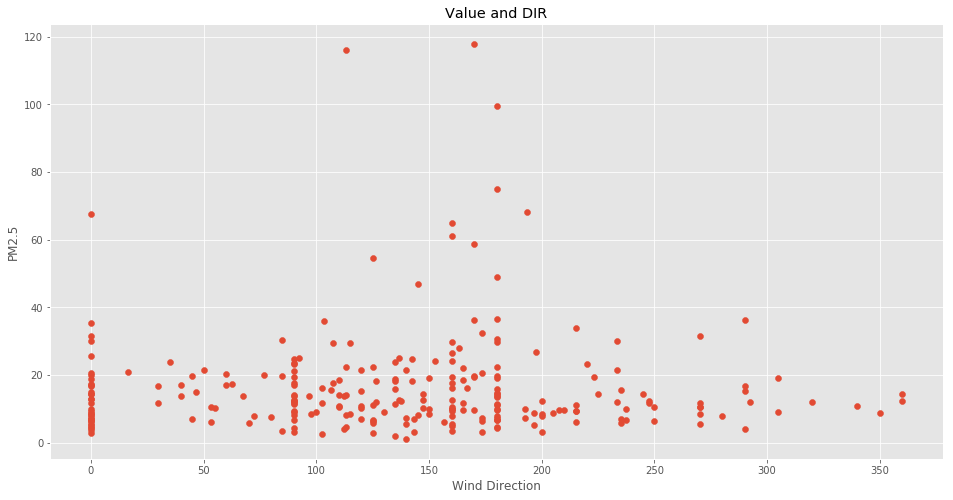

In [65]:
x = merge.DIR
y = merge.Value
plt.scatter(x,y)
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5')
plt.title('Value and DIR')
#plt.xlim(0, 990)
plt.show()

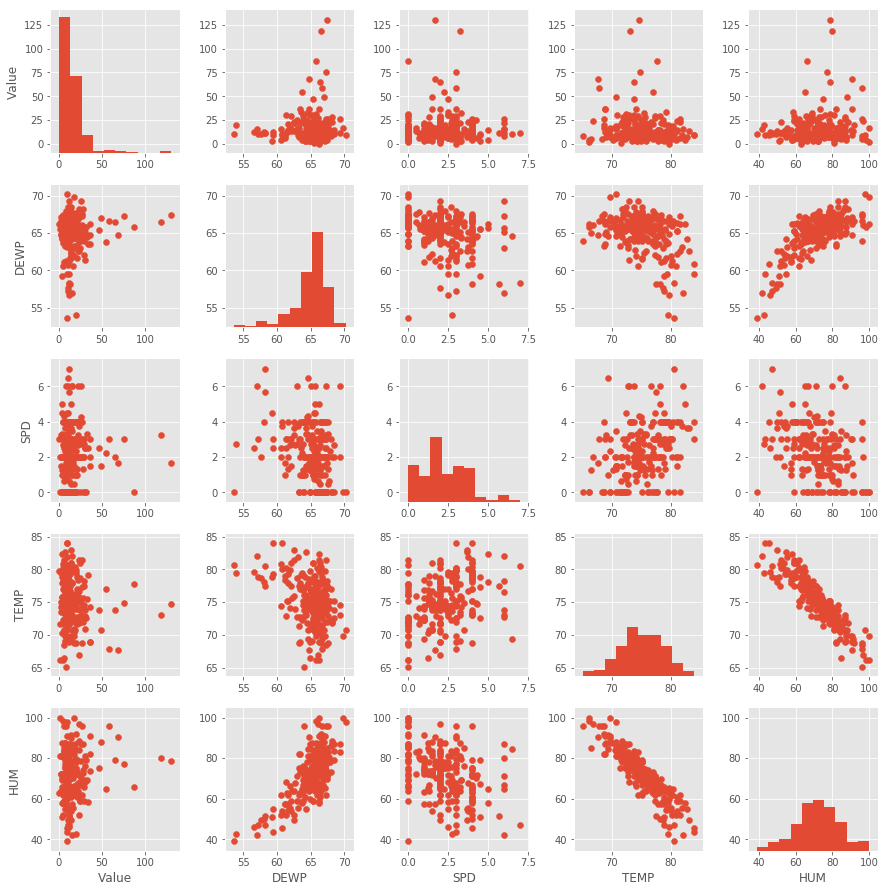

In [61]:
import seaborn as sns
g = sns.PairGrid(merge, vars=[ "Value","DEWP",  "SPD", "TEMP", "HUM"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

## Convert TEMP and DEWP from F to C

In [39]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
merge['TEMP'] = (merge.TEMP - 32) * 5.0/9.0

In [40]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
merge['DEWP'] = (merge.DEWP - 32) * 5.0/9.0

In [41]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat
0,96,2017-10-15,7.784710,200.000000,68.000000,2.0,25.000000,1005.840000,18.722222,October,10
1,97,2017-10-16,6.511036,0.000000,59.000000,0.0,27.500000,1005.280000,19.000000,October,10
2,98,2017-10-17,4.557446,113.333333,69.666667,2.0,25.722222,1006.953333,19.703704,October,10
3,99,2017-10-18,8.152256,0.000000,86.000000,0.0,22.388889,1003.380000,20.000000,October,10
4,100,2017-10-19,6.008917,70.000000,81.000000,2.5,23.000000,1007.900000,19.611111,October,10


# Convert SPD from Mph to Kph

In [42]:
# 1 mph = 1.60934 kph
merge['SPD'] = merge.SPD * 1.60934


## Convert DEWP to HUM
Our historical weather data has dew point as a feature. However our weather api's we will be using to collect data from will give humidity percentage. There is a formula to convert between these features that we will be using.

From the Marine and Atmospheric Science school at the University of Miami:
RH: =100*(EXP((17.625*TD)/(243.04+TD))/EXP((17.625*T)/(243.04+T))) 

In [70]:
import math

#df2['HUM'] = 100*(np.exp((17.625 * df2['DEWP'])/(243.04 + df2['DEWP']))/np.exp((17.625 * df2['TEMP'])/(243.04 + df2['TEMP'])))


In [43]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat
0,96,2017-10-15,7.784710,200.000000,68.000000,3.21868,25.000000,1005.840000,18.722222,October,10
1,97,2017-10-16,6.511036,0.000000,59.000000,0.00000,27.500000,1005.280000,19.000000,October,10
2,98,2017-10-17,4.557446,113.333333,69.666667,3.21868,25.722222,1006.953333,19.703704,October,10
3,99,2017-10-18,8.152256,0.000000,86.000000,0.00000,22.388889,1003.380000,20.000000,October,10
4,100,2017-10-19,6.008917,70.000000,81.000000,4.02335,23.000000,1007.900000,19.611111,October,10


In [55]:
merge['DIR_sin'] = np.sin(merge.DIR*(2.*np.pi/360))
merge['DIR_cos'] = np.cos(merge.DIR*(2.*np.pi/360))

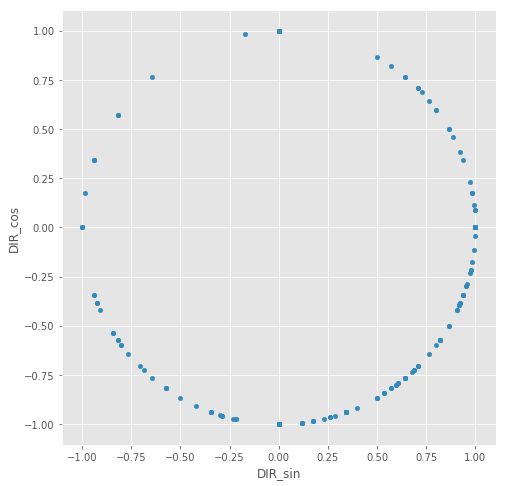

In [56]:
merge.plot.scatter('DIR_sin','DIR_cos').set_aspect('equal')
plt.show()

In [57]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat,DIR_sin,DIR_cos
0,11,2017-07-12,25.961379,110.000000,87.000000,9.656040,22.777778,1006.280000,20.722222,July,5,0.939693,-3.420201e-01
1,62,2017-09-11,12.885987,90.000000,71.500000,2.414010,24.805556,1003.715000,19.333333,September,11,1.000000,6.123234e-17
2,63,2017-09-12,14.465070,270.000000,65.000000,8.046700,25.611111,1002.260000,18.722222,September,11,-1.000000,-1.836970e-16
3,92,2017-10-11,11.906957,90.000000,82.000000,2.414010,22.055556,1004.945000,18.763889,October,10,1.000000,6.123234e-17
4,93,2017-10-12,10.451795,103.333333,73.666667,2.145787,24.129630,1005.316667,19.129630,October,10,0.973045,-2.306159e-01


In [64]:
#df2 = df2.drop(['month'],axis=1)
#.shape

In [341]:
#df2.head()

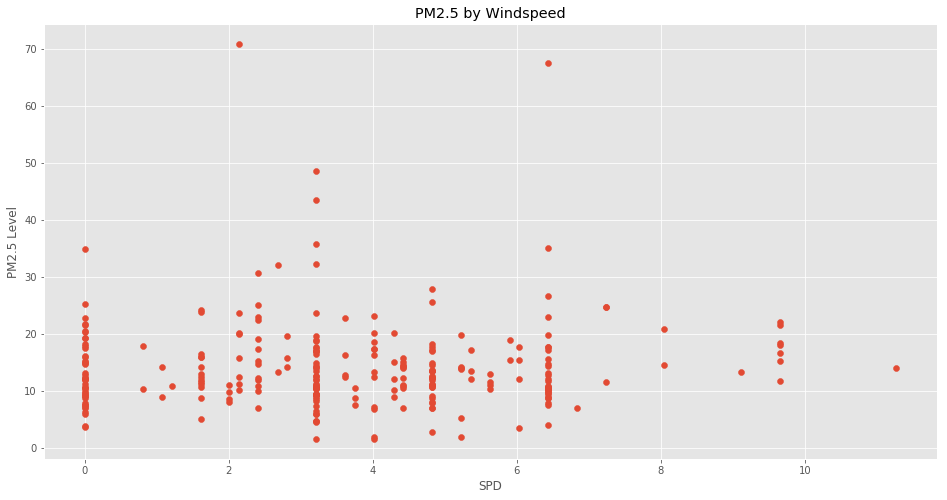

In [342]:
x = merge['SPD']
y = merge['Value']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

In [242]:
merge = merge.drop(merge[merge.SPD > 20].index)

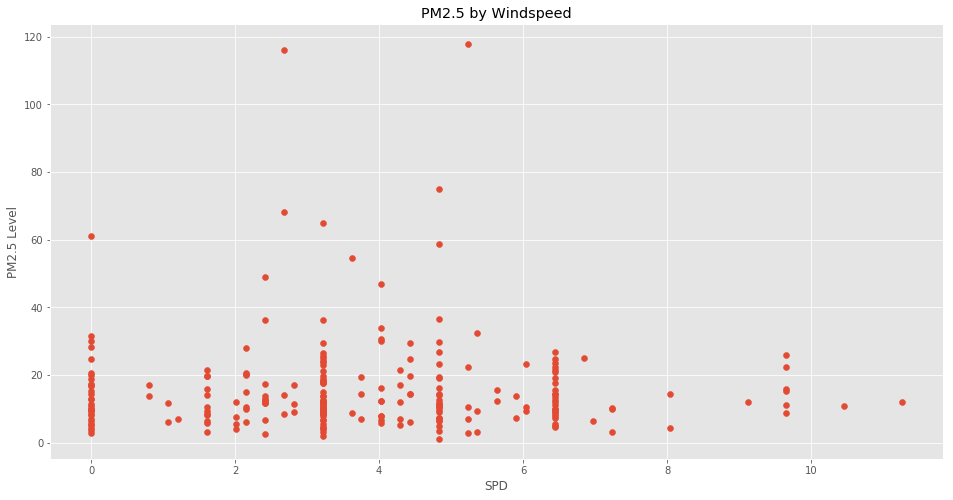

In [243]:
x = merge['SPD']
y = merge['Value']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

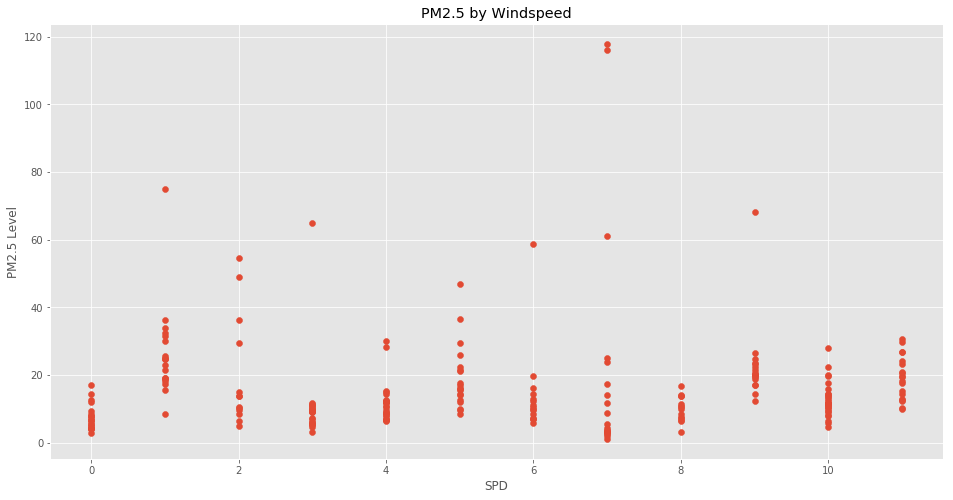

In [244]:
x = merge['month_cat']
y = merge['Value']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

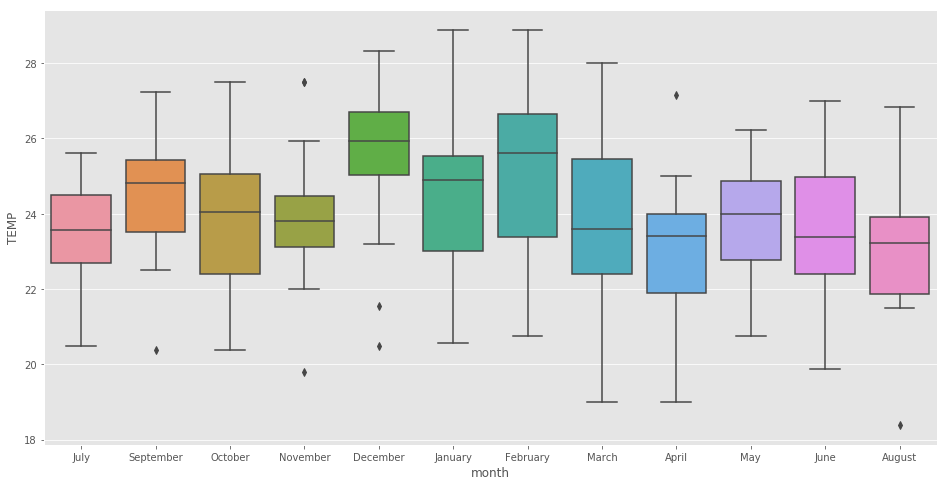

In [245]:
ax = sns.boxplot(x="month", y="TEMP", data=merge)

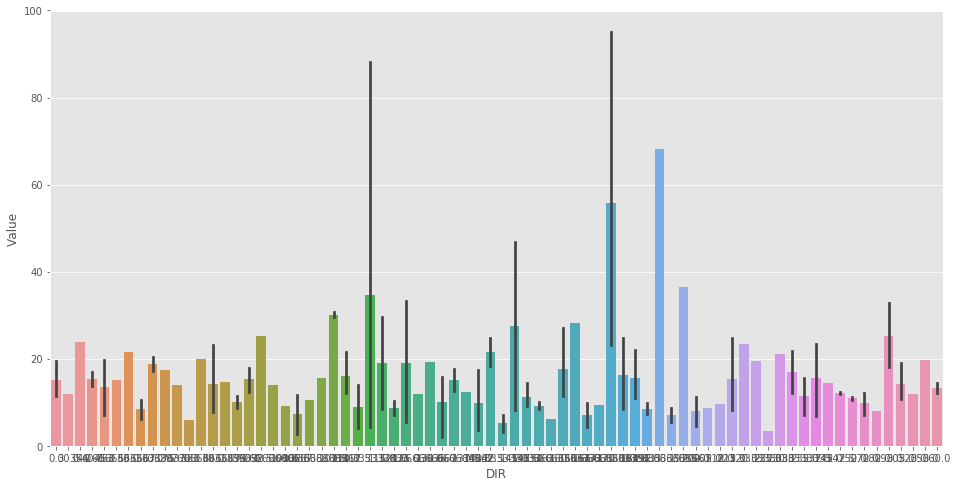

In [246]:
sns.barplot(x="DIR", y="Value", data=merge);

In [65]:
loadx = merge[['Value', 'DIR']].groupby(['DIR']).median()

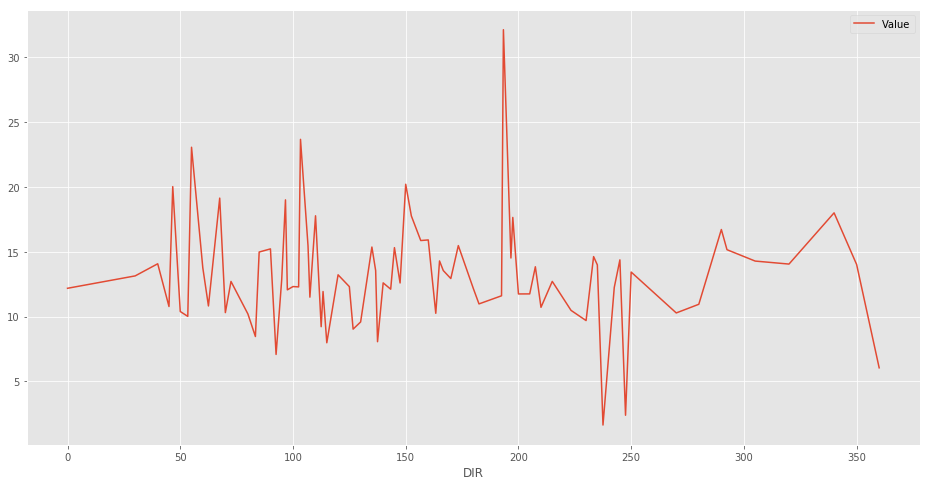

In [66]:
loadx.plot(kind='line')

In [44]:
merge['my_dates'] = pd.to_datetime(merge['Date'])

merge['day_of_week'] = merge['my_dates'].dt.day_name()


In [45]:
merge['day_week_cat'] = merge.day_of_week.astype("category").cat.codes

In [46]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,month_cat,my_dates,day_of_week,day_week_cat
0,96,2017-10-15,7.784710,200.000000,68.000000,3.21868,25.000000,1005.840000,18.722222,October,10,2017-10-15,Sunday,3
1,97,2017-10-16,6.511036,0.000000,59.000000,0.00000,27.500000,1005.280000,19.000000,October,10,2017-10-16,Monday,1
2,98,2017-10-17,4.557446,113.333333,69.666667,3.21868,25.722222,1006.953333,19.703704,October,10,2017-10-17,Tuesday,5
3,99,2017-10-18,8.152256,0.000000,86.000000,0.00000,22.388889,1003.380000,20.000000,October,10,2017-10-18,Wednesday,6
4,100,2017-10-19,6.008917,70.000000,81.000000,4.02335,23.000000,1007.900000,19.611111,October,10,2017-10-19,Thursday,4


In [52]:
print(merge['day_of_week'].unique())

['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']


In [53]:
print(merge.groupby('day_of_week').size())

day_of_week
Friday       34
Monday       42
Saturday     33
Sunday       31
Thursday     38
Tuesday      38
Wednesday    38
dtype: int64


C:\Users\Wabinyai\Anaconda2\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


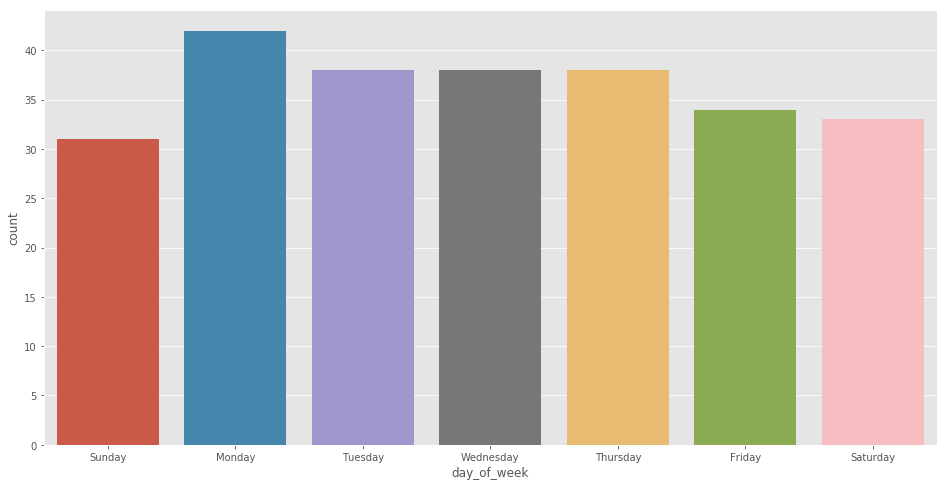

In [54]:
sns.countplot(merge['day_of_week'],label="Count")
plt.show()

In [47]:
merge = merge.rename(columns={"month_cat": "Month"})

In [102]:
#merge.head(150)

In [48]:
# Create a dataframe for each month. Less thinking than slicing it for each visualization. Could do this with a function also
month1 = merge[merge.Month == 0] #April
month2 = merge[merge.Month == 1] #August
month3 = merge[merge.Month == 2] #December
month4 = merge[merge.Month == 3] #February
month5 = merge[merge.Month == 4] #January
month6 = merge[merge.Month == 5] # July
month7 = merge[merge.Month == 6] #June
month8 = merge[merge.Month == 7] #March
month9 = merge[merge.Month == 8]  #May
month10 = merge[merge.Month == 9] #November
month11 = merge[merge.Month == 10] #October
month12 = merge[merge.Month == 11] #September

# Monthly Correlation

In [49]:
d =  month3.corr()
#print d

In [50]:
#merge.drop(['Day','Date','DIR_sin','DIR_cos','Month','DEWP'], axis=1).corr(method='spearman')


In [51]:
#month8.drop(['Day','Date','DIR_sin','DIR_cos','Month','DEWP'], axis=1).corr(method='pearson')
month1.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,Month,my_dates,day_of_week,day_week_cat
16,113,2017-04-11,6.005219,235.0,81.75,7.242030,21.500000,1006.4800,18.208333,April,0,2017-04-11,Tuesday,5
43,141,2017-04-12,23.800246,135.0,85.00,1.609340,22.194444,1008.0750,19.666667,April,0,2017-04-12,Wednesday,6
89,192,2018-04-02,11.707585,165.0,51.75,3.218680,27.152778,1004.0475,15.902778,April,0,2018-04-02,Monday,1
133,238,2018-04-04,4.049000,112.5,87.25,2.011675,21.277778,1005.8375,19.138889,April,0,2018-04-04,Wednesday,6
138,245,2018-04-13,7.226486,192.5,77.25,4.828020,23.597222,1006.2575,19.291667,April,0,2018-04-13,Friday,0


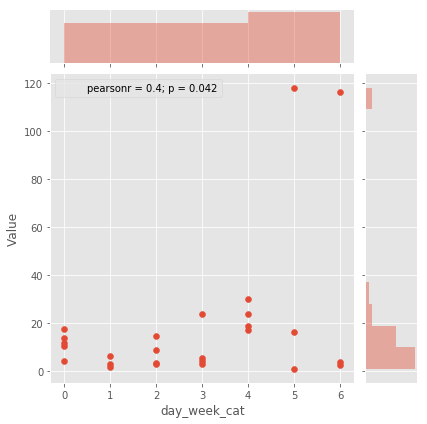

In [181]:
ax = sns.jointplot(x="day_week_cat", y="Value", data=month8)

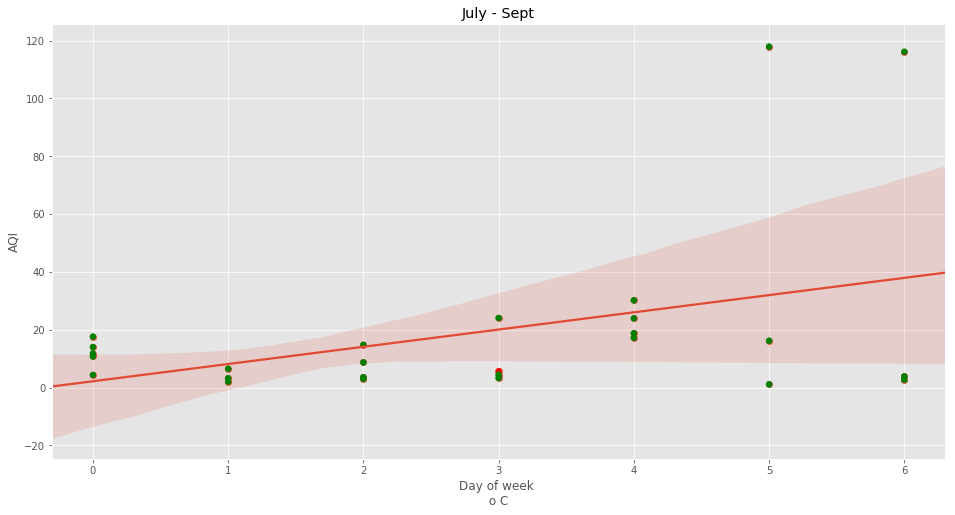

In [185]:
x = month8['day_week_cat']
y = month8['Value']
col = np.where(month2['Value']<=50,'green',np.where(month2['Value']>50,'red','Cyan'))
sns.regplot(x,y)
plt.scatter(x,y, c=col)
plt.xlabel('Day of week \n o C ')
plt.ylabel('AQI')
#plt.title('linear regression between PM2.5 concentration and RH- \n Oct-Dec.')
plt.title('July - Sept')
plt.show()

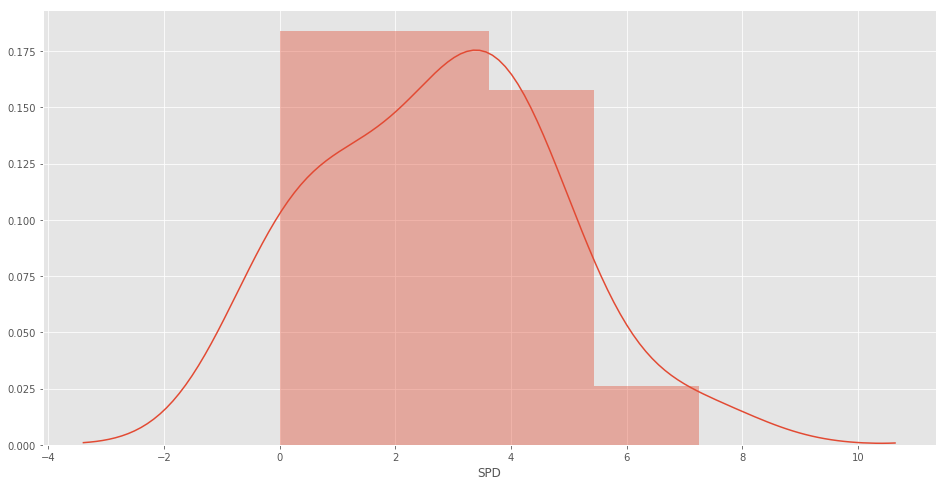

In [114]:
x = month1['SPD']
sns.distplot(x)
#sns.distplot(merge.Value)

# Graph with 

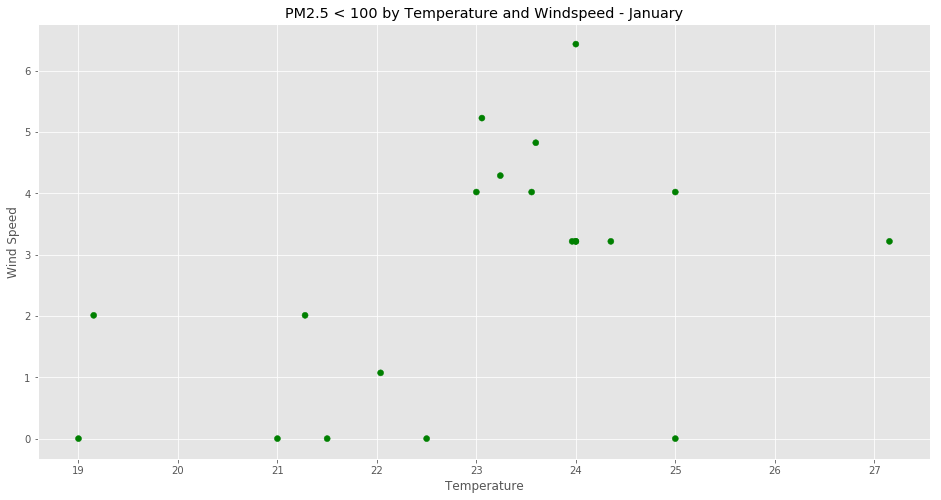

In [131]:
x = month1['TEMP']
y = month1['SPD']
col = np.where(month1['Value']<100,'green',np.where(month1['Value']>100,'None','None'))
plt.scatter(x,y, c=col)
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.title('PM2.5 < 100 by Temperature and Windspeed - January')
plt.show()

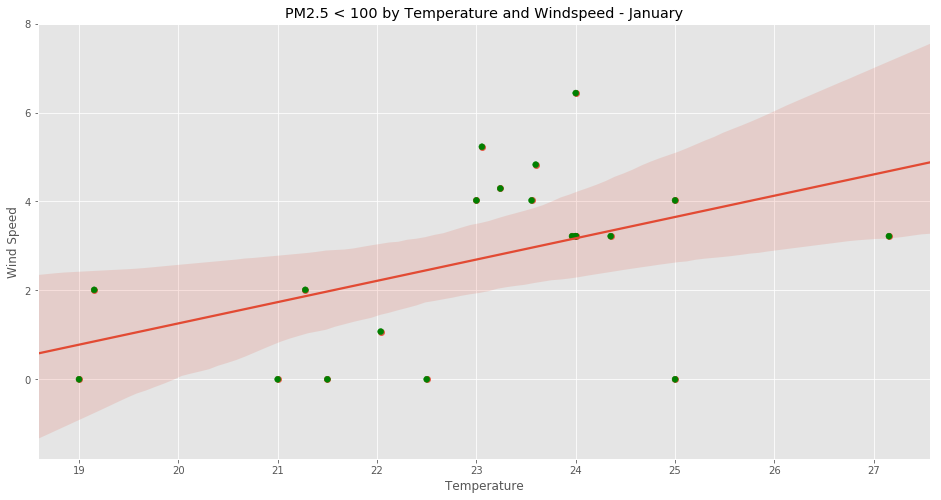

In [82]:
x = month1['TEMP']
y = month1['SPD']
col = np.where(month1['Value']<=50,'green',np.where(month1['Value']>50,'red','Cyan'))
sns.regplot(x,y)
plt.scatter(x,y, c=col)
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.title('PM2.5 < 100 by Temperature and Windspeed - January')
plt.show()

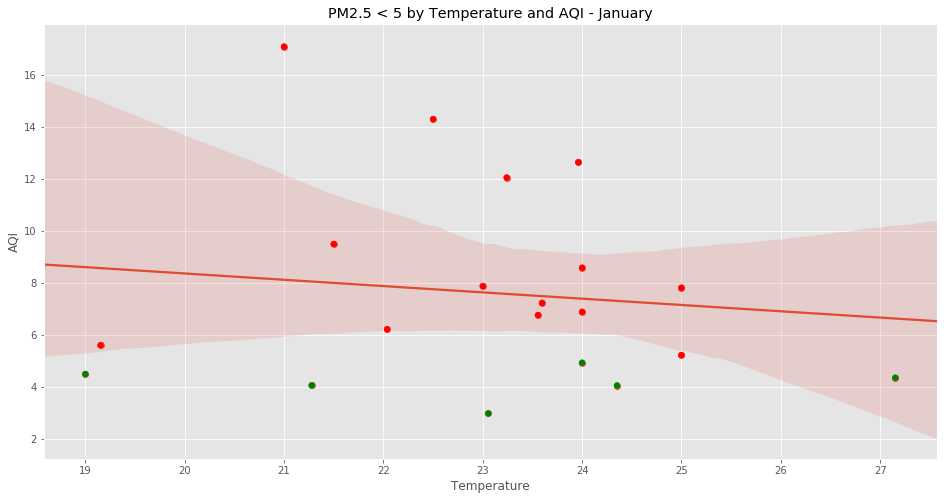

In [64]:
x = month1['TEMP']
y = month1['Value']
#col = np.where(month1['Value']<100,'green',np.where(month1['Value']>100,'None','None'))
col = np.where(month1['Value']<=5,'green',np.where(month1['Value']>5,'red','None'))
sns.regplot(x,y)
plt.scatter(x,y, c=col)
plt.xlabel('Temperature')
plt.ylabel('AQI')
plt.title('PM2.5 < 5 by Temperature and AQI - January')
plt.show()

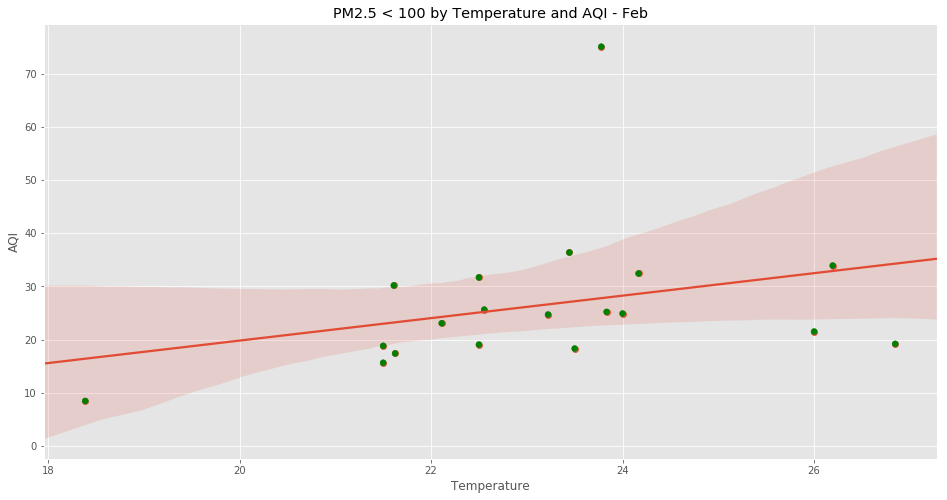

In [136]:
x = month2['TEMP']
y = month2['Value']
#col = np.where(month1['Value']<100,'green',np.where(month1['Value']>100,'None','None'))
sns.regplot(x,y)
plt.scatter(x,y, c=col)
plt.xlabel('Temperature')
plt.ylabel('AQI')
plt.title('PM2.5 < 100 by Temperature and AQI - Feb')
plt.show()

In [142]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,Month,DIR_sin,DIR_cos,DIR_W
0,11,2017-07-12,25.961379,110.000000,87.000000,9.656040,22.777778,1006.280000,20.722222,July,5,0.939693,-3.420201e-01,E
1,62,2017-09-11,12.885987,90.000000,71.500000,2.414010,24.805556,1003.715000,19.333333,September,11,1.000000,6.123234e-17,E
2,63,2017-09-12,14.465070,270.000000,65.000000,8.046700,25.611111,1002.260000,18.722222,September,11,-1.000000,-1.836970e-16,W
3,92,2017-10-11,11.906957,90.000000,82.000000,2.414010,22.055556,1004.945000,18.763889,October,10,1.000000,6.123234e-17,E
4,93,2017-10-12,10.451795,103.333333,73.666667,2.145787,24.129630,1005.316667,19.129630,October,10,0.973045,-2.306159e-01,E


# Changing degrees to direction

In [132]:
labels=['N','NE','E','SE','S','SW','W','NW']

In [133]:
###### For our purposes hazardous is hazardous, no need to apply a different category.
merge['DIR_W'] = pd.cut(merge['DIR'],[-22.5,22.5,67.5,112.5,157,202.5,247,292.5,337],labels=labels)

In [141]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,Month,DIR_sin,DIR_cos,DIR_W
0,11,2017-07-12,25.961379,110.000000,87.000000,9.656040,22.777778,1006.280000,20.722222,July,5,0.939693,-3.420201e-01,E
1,62,2017-09-11,12.885987,90.000000,71.500000,2.414010,24.805556,1003.715000,19.333333,September,11,1.000000,6.123234e-17,E
2,63,2017-09-12,14.465070,270.000000,65.000000,8.046700,25.611111,1002.260000,18.722222,September,11,-1.000000,-1.836970e-16,W
3,92,2017-10-11,11.906957,90.000000,82.000000,2.414010,22.055556,1004.945000,18.763889,October,10,1.000000,6.123234e-17,E
4,93,2017-10-12,10.451795,103.333333,73.666667,2.145787,24.129630,1005.316667,19.129630,October,10,0.973045,-2.306159e-01,E


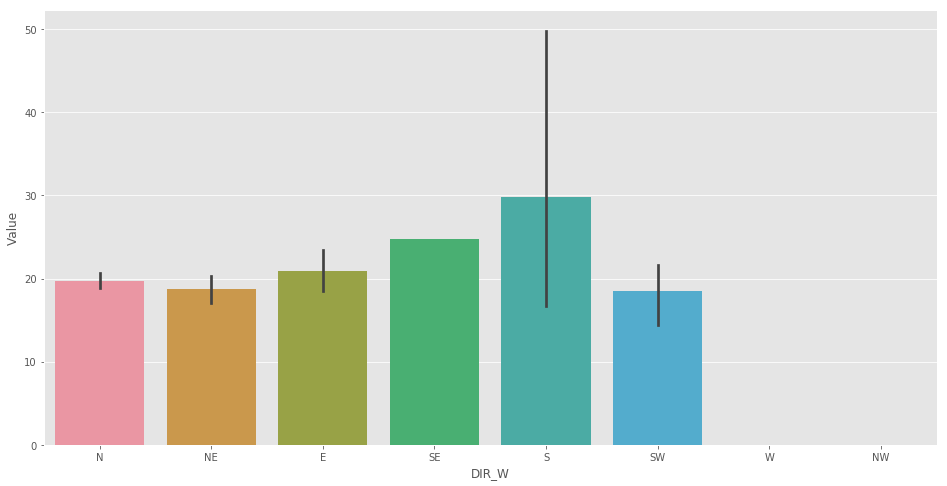

In [153]:
sns.barplot(x="DIR_W", y="Value", data=month10);

# Dividing pressure into 5 intervals

In [108]:
#presure = [990-995, 995-1000, 1000-1005, 1005-1010, 1010-1015, 1015-1020, 1020-1025, 1025-1030]
presure = ['995-1000','1000-1005','1005-1010','1010-1015','1015-1020']

In [109]:
# For our purposes hazardous is hazardous, no need to apply a different category.
merge['PreClass'] = pd.cut(merge['PRES'],[995,1000,1005,1010,1015,1020],labels=presure)

In [118]:
merge.head()

,Day,Date,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,month,Month,DIR_sin,DIR_cos,PreClass
0,11,2017-07-12,25.961379,110.000000,87.000000,9.656040,22.777778,1006.280000,20.722222,July,5,0.939693,-3.420201e-01,1005-1010
1,62,2017-09-11,12.885987,90.000000,71.500000,2.414010,24.805556,1003.715000,19.333333,September,11,1.000000,6.123234e-17,1000-1005
2,63,2017-09-12,14.465070,270.000000,65.000000,8.046700,25.611111,1002.260000,18.722222,September,11,-1.000000,-1.836970e-16,1000-1005
3,92,2017-10-11,11.906957,90.000000,82.000000,2.414010,22.055556,1004.945000,18.763889,October,10,1.000000,6.123234e-17,1000-1005
4,93,2017-10-12,10.451795,103.333333,73.666667,2.145787,24.129630,1005.316667,19.129630,October,10,0.973045,-2.306159e-01,1005-1010


In [122]:
#sns.barplot(x="PRES", y="Value", data=merge);
#sns.regplot(x,y)

# Wind speed divided into 3 parts

In [236]:
windspeed =['0-3','3.1-7','7.1-15']

In [242]:
# For our purposes hazardous is hazardous, no need to apply a different category.
merge['SPD_class'] = pd.cut(merge['SPD'],[0,3,7,15],labels=windspeed)

In [263]:
#merge.boxplot(column='SPD')

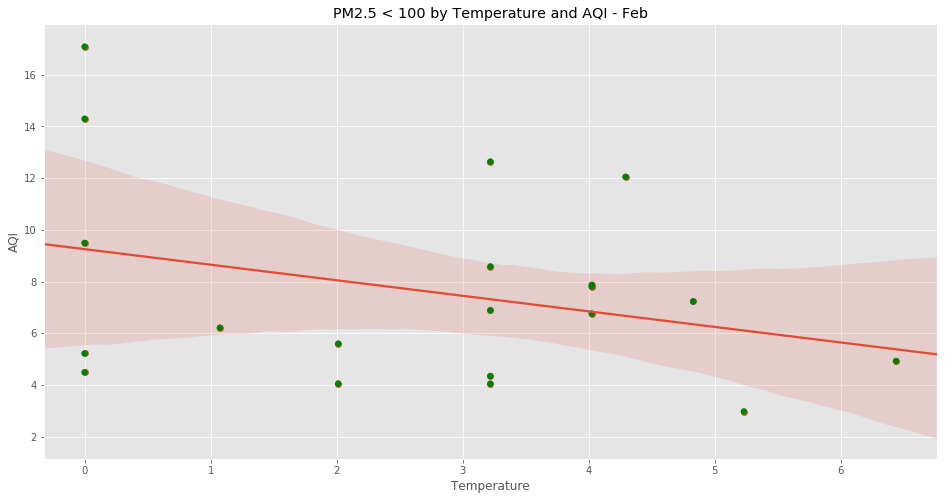

In [265]:
x = month1['SPD']
y = month1['Value']
#col = np.where(month1['Value']<100,'green',np.where(month1['Value']>100,'None','None'))
sns.regplot(x,y)
plt.scatter(x,y, c=col)
plt.xlabel('Wind speed')
plt.ylabel('AQI')
plt.title('PM2.5 < 100 by Temperature and AQI - Feb')
plt.show()

# Windrose WIND DIRECTION AND POLLUTION

In [108]:
from matplotlib import pyplot as plt
from math import radians

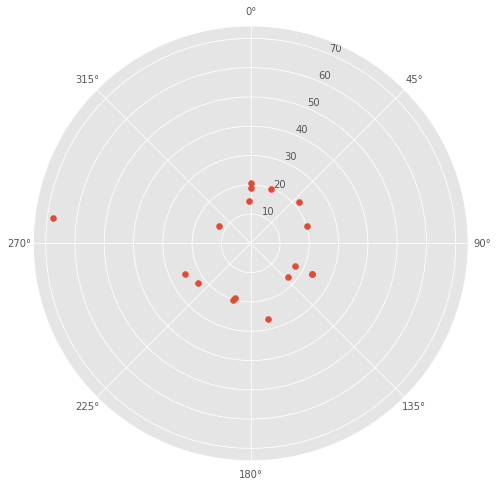

In [152]:
ax = plt.subplot(111, polar =True)
ax.scatter(x=month10['DIR'],y=month10['Value'])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# AQI Category

In [96]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

In [97]:
# For our purposes hazardous is hazardous, no need to apply a different category.
merge['AQI'] = pd.cut(merge['Value'],[-50,12,35.4,55.4,150.4,250.4,1000],labels=columns)

In [98]:
merge.head()
#ax = sns.boxplot(x="month", y="Value", data=merge)

,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,Month,day_week_cat,AQI
0,7.784710,200.000000,68.000000,3.21868,25.000000,1005.840000,18.722222,10,3,Good
1,6.511036,0.000000,59.000000,0.00000,27.500000,1005.280000,19.000000,10,1,Good
2,4.557446,113.333333,69.666667,3.21868,25.722222,1006.953333,19.703704,10,5,Good
3,8.152256,0.000000,86.000000,0.00000,22.388889,1003.380000,20.000000,10,6,Good
4,6.008917,70.000000,81.000000,4.02335,23.000000,1007.900000,19.611111,10,4,Good


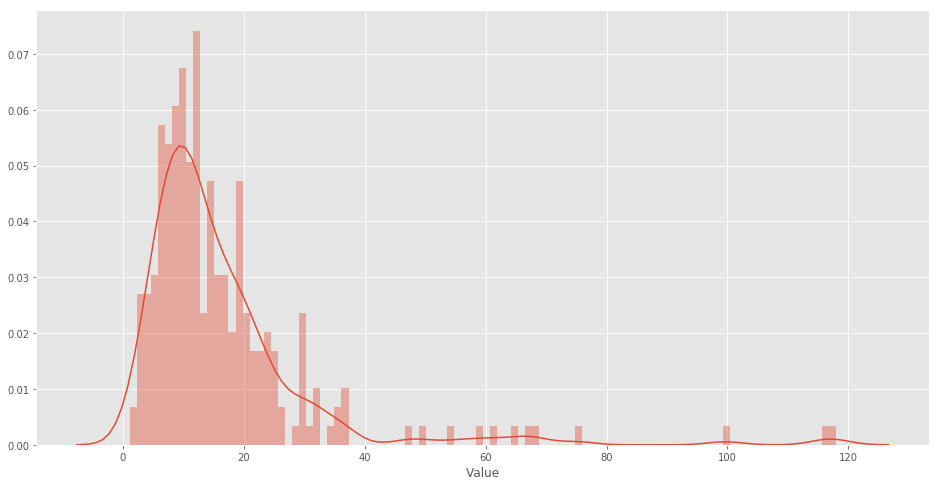

In [156]:
#sns.boxplot(x="AQI", y="Value", data=merge);]
x=merge["Value"]
sns.distplot(x, bins=100)

# Dropping un wanted column

In [57]:
#merge= merge.drop(['Date','Day','month','DIR_sin','DIR_cos','DIR_W','AQI','Month','PRES','DEWP','Day','SPD_class','PreClass'], axis=1)

In [58]:
#merge = merge.drop(['Date','Day','month','day_of_week','my_dates'],axis=1)

In [59]:
merge.head()

,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,Month,day_week_cat
0,7.784710,200.000000,68.000000,3.21868,25.000000,1005.840000,18.722222,10,3
1,6.511036,0.000000,59.000000,0.00000,27.500000,1005.280000,19.000000,10,1
2,4.557446,113.333333,69.666667,3.21868,25.722222,1006.953333,19.703704,10,5
3,8.152256,0.000000,86.000000,0.00000,22.388889,1003.380000,20.000000,10,6
4,6.008917,70.000000,81.000000,4.02335,23.000000,1007.900000,19.611111,10,4


# Prepare Data Set for Regression

In [74]:
#y = merge['Value']
#X = merge.drop(['Value'], axis=1)

X = merge[[ 'HUM', 'SPD', 'Value']]
y = merge['TEMP']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [101]:
X_train.shape, y_train.shape

((177, 9), (177,))

In [102]:
X_test.shape, y_test.shape

((77, 9), (77,))

# Implement ML Algorithms

In [37]:
from math import sqrt

# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
regr = LinearRegression()

In [77]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [79]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.83793802241783866

In [80]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, lin_pred))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

('Coefficients: \n', array([-0.28795852, -0.0639848 , -0.00481853]))
Mean squared error: 2.05
Mean absolute error: 1.12
R-squared: 0.84


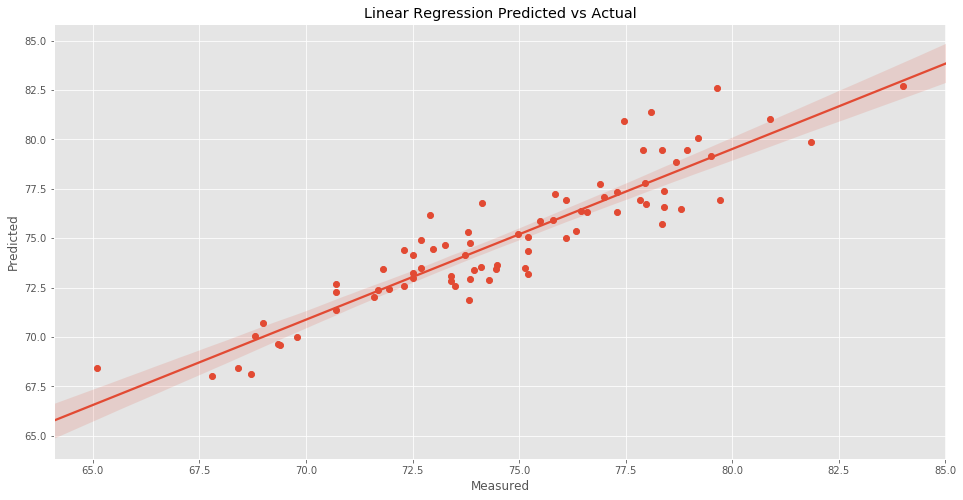

In [81]:
plt.scatter(y_test, lin_pred)
sns.regplot(y_test,lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Gaussian Regression

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn import model_selection

# Create MLPRegressor object
gpr = GaussianProcessRegressor()

In [83]:
# Train the model using the training sets
gpr.fit(X_train, y_train)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [84]:
# Score the model
GP_regression_score = gpr.score(X_test, y_test)
GP_regression_score

-237.37405953636087

In [85]:
# Make predictions using the testing set
gpr_pred = gpr.predict(X_test)

In [86]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, gpr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, gpr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, gpr_pred))

Root mean squared error: 54.89
Mean absolute error: 49.92
R-squared: -237.37


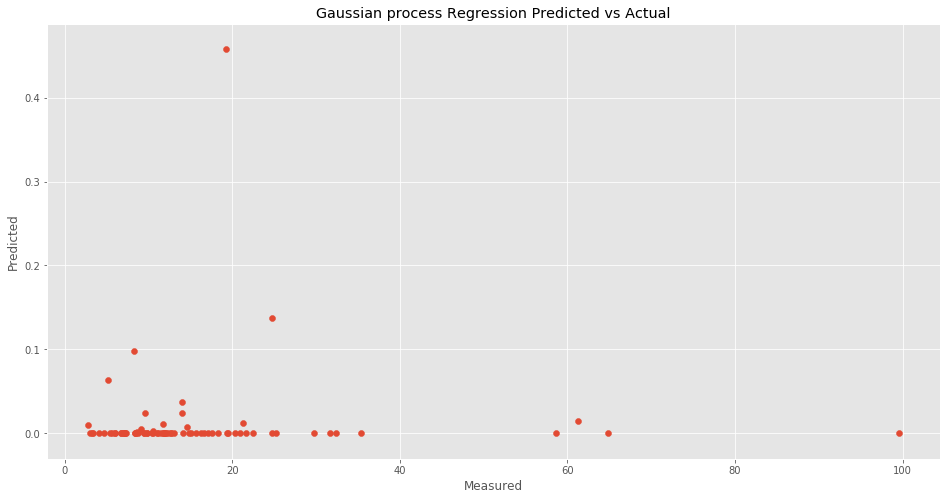

In [76]:
plt.scatter(y_test, gpr_pred)
#sns.regplot(y_test,gpr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Gaussian process Regression Predicted vs Actual')
plt.show()

# Random Forest Regression

In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

In [88]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [89]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.82138441881822444

In [90]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [91]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 1.50
Mean absolute error: 1.22
R-squared: 0.82


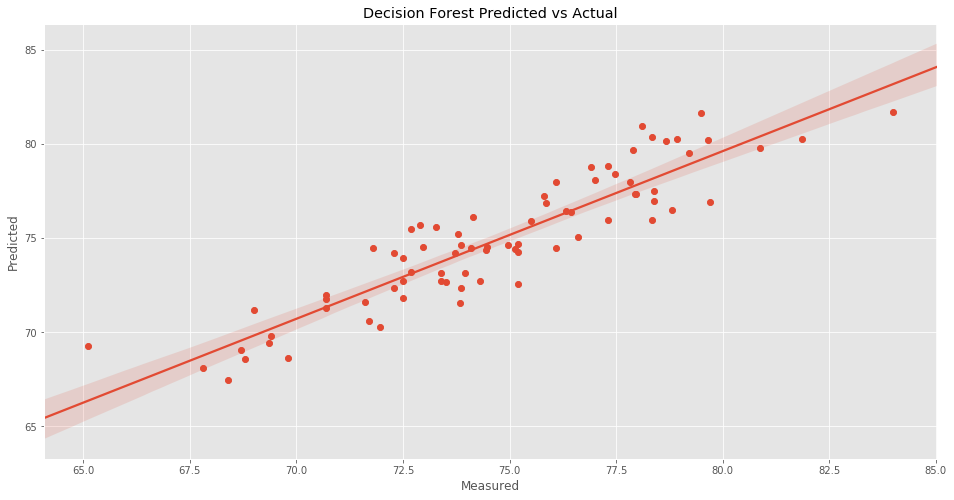

In [92]:
plt.scatter(y_test, regr_rf_pred)
sns.regplot(y_test,regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

# Extra Trees Regression

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [100]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [101]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.81292899446531208

In [102]:
extratree_pred = extra_tree.predict(X_test)

In [103]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, extratree_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, extratree_pred))

Root mean squared error: 1.54
Mean absolute error: 1.25
R-squared: 0.81


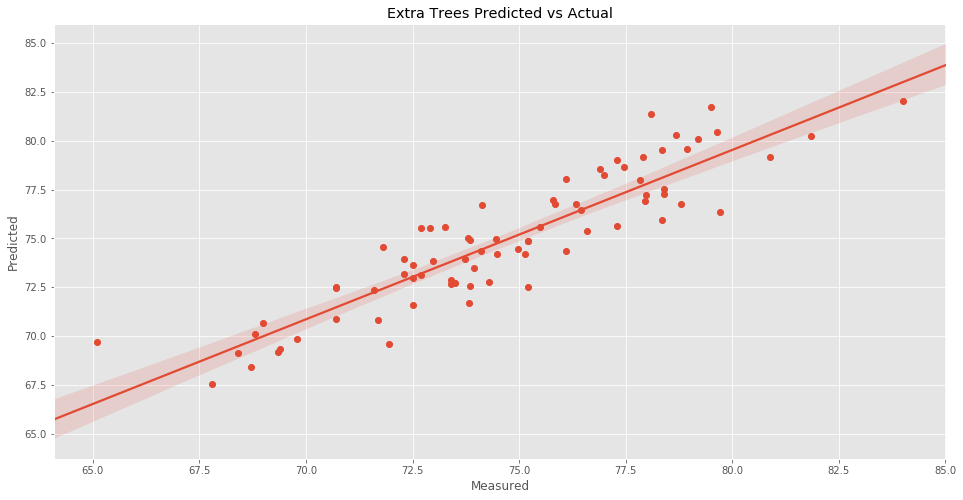

In [104]:
plt.scatter(y_test, extratree_pred)
sns.regplot(y_test,extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

# #Neural Network Regression

In [105]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [106]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

C:\Users\Wabinyai\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [107]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

-15.563217971304319

In [108]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [109]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, nnr_pred))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

('Coefficients: \n', array([-0.28795852, -0.0639848 , -0.00481853]))
Mean squared error: 209.37
Mean absolute error: 11.64
R-squared: -15.56


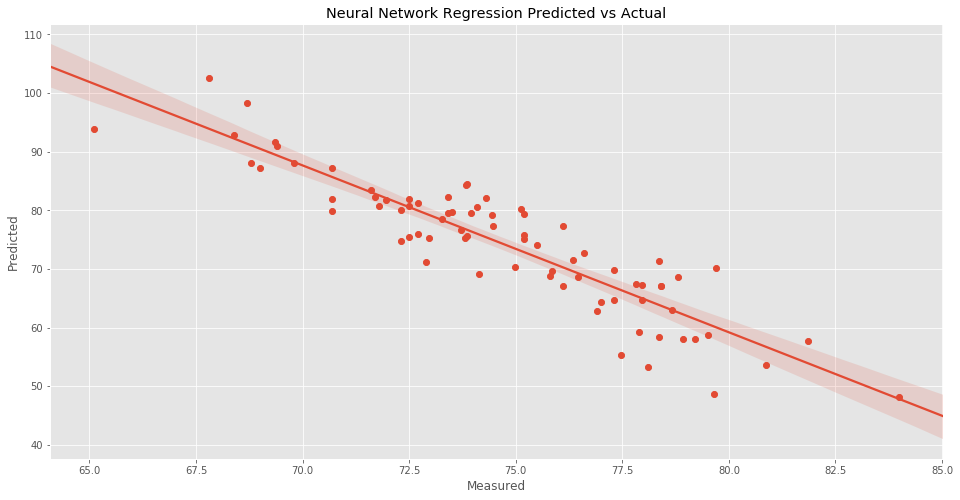

In [110]:
plt.scatter(y_test, nnr_pred)
sns.regplot(y_test,nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [135]:
# saving 

In [144]:
#merge.to_csv('E:/RESEAERCH/FEEDS/ENTE/MERG1.csv')

# Implementing Gaussian Process Regressor

In [176]:
doo =r'E:/RESEAERCH/FEEDS/ENTE/MERG1.csv'

In [177]:
# Let's first load the data and take a look at what we have.
df3 = pd.read_csv(doo)
print df3.head()

   Unnamed: 0  id  Day      Value         DIR        HUM       SPD       TEMP  \
0           0   0    8  69.018476  103.333333  73.666667  2.145787  24.129630   
1           1   1   11  79.535000  200.000000  68.000000  3.218680  25.000000   
2           2   2   12  62.670389    0.000000  59.000000  0.000000  27.500000   
3           3   3   13  40.956432  113.333333  69.666667  3.218680  25.722222   
4           4   4   14  36.449022    0.000000  86.000000  0.000000  22.388889   

          PRES       DEWP  Month  
0  1005.316667  19.129630     10  
1  1005.840000  18.722222     10  
2  1005.280000  19.000000     10  
3  1006.953333  19.703704     10  
4  1003.380000  20.000000     10  


In [152]:
#Un named column
#df3 = df3.rename(columns={"Unnamed: 0": "id"})

In [178]:
df3.head()

,Unnamed: 0,id,Day,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,Month
0,0,0,8,69.018476,103.333333,73.666667,2.145787,24.129630,1005.316667,19.129630,10
1,1,1,11,79.535000,200.000000,68.000000,3.218680,25.000000,1005.840000,18.722222,10
2,2,2,12,62.670389,0.000000,59.000000,0.000000,27.500000,1005.280000,19.000000,10
3,3,3,13,40.956432,113.333333,69.666667,3.218680,25.722222,1006.953333,19.703704,10
4,4,4,14,36.449022,0.000000,86.000000,0.000000,22.388889,1003.380000,20.000000,10


In [154]:
#df3.to_csv('E:/RESEAERCH/FEEDS/ENTE/MERG1.csv')

In [184]:
 #Using numpy to read the data
data1 = np.genfromtxt(doo,  delimiter=',', skip_header=1)
#print data1
yy = data1[:,[4]]
xx = data1[:,[2]]
#print yy

In [161]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata


# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.0361)  # noise terms
kernel_gpml = k1 + k2 + k3 + k4

gp = GaussianProcessRegressor(kernel=kernel_gpml, alpha=0,
                              optimizer=None, normalize_y=True)
gp.fit(xx, yy)
print '------'
print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

------
GPML kernel: 66**2 * RBF(length_scale=67) + 2.4**2 * RBF(length_scale=90) * ExpSineSquared(length_scale=1.3, periodicity=1) + 0.66**2 * RationalQuadratic(alpha=0.78, length_scale=1.2) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.0361)
Log-marginal-likelihood: -4262396.858


In [164]:
X_ = np.linspace(xx.min()-1, xx.max() + 8, 500)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)
#print y_pred
#print y_std

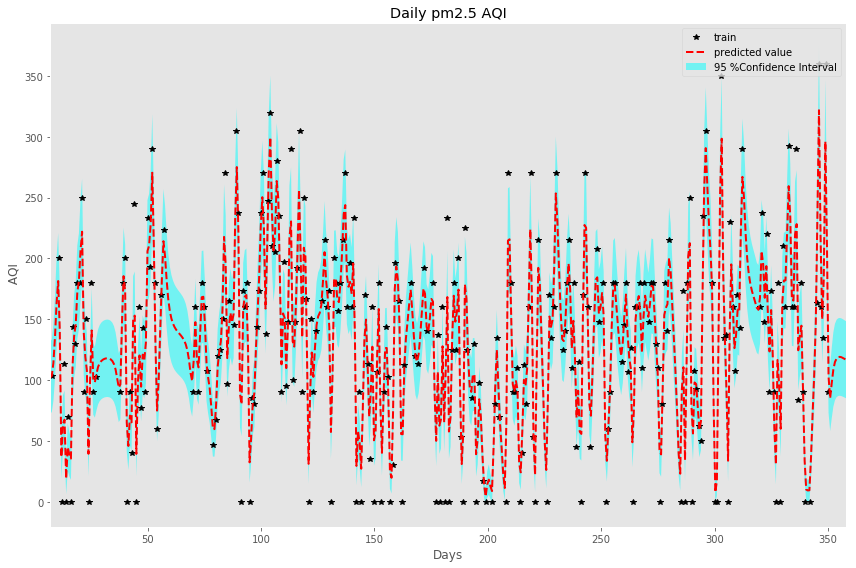

In [167]:
# Illustration
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(xx, yy,'*', c='black',linewidth=7.0, label = 'train')
#plt.scatter(x12,y12,s=80,label ='test')
#plt.plot(x12, y12,'o', c='b',  alpha=1.0,label = 'test')
#plt.plot(x12, y12,'*', c='b', label = 'real value')
#plt.plot(X_, y_pred, 'r-', label='prediction value')
plt.plot(X_, y_pred,'--',alpha=1.0,linewidth=2.0, c='r',label='predicted value')
myne="95 %Confidence Interval"
sigma = np.sqrt(y_pred)
plt.fill(np.concatenate([X_, X_[::-1]]),
         np.concatenate([y_pred - 2.93 * sigma,
                        (y_pred + 2.93 * sigma)[::-1]]),
                         alpha=.5, fc='Cyan', ec='None',label=myne)

plt.xlim(X_.min(), X_.max())
plt.xlim(370., 375.5)
#plt.ylim(11.5,17.5)

plt.xlabel("Days")
plt.ylabel(r" AQI")
plt.title(r"Daily pm2.5 AQI")
plt.tight_layout()
plt.legend(loc=1)
#plt.legend()
plt.grid()
plt.show()

 # CLASSIFICATION 

| AQI Category | Low Breakpoint | High Breakpoint |
| :--------------: | :----------------: | :-----------------: |
| GOOD | 0 | 12 |
| MODERATE | 12.1 | 35.4 |
| UNHEALTHY FOR SENSITIVE | 35.5 | 55.4 |
| UNHEALTHY |55.5 | 150.4 |
| VERY UNHEALTHY | 150.5 | 250.4 |
| HAZARDOUS | 250.5 | 350.4 |
| HAZARDOUS | 350.5 | 500.4 |

Source: US EPA - https://aqs.epa.gov/aqsweb/documents/codetables/aqi_breakpoints.html

We will assign a numerical category to each AQI category from 1-5. Good being 1 and Hazardous being 6.

In [103]:
merge.head()

,Value,DIR,HUM,SPD,TEMP,PRES,DEWP,Month,day_week_cat,AQI
0,7.784710,200.000000,68.000000,3.21868,25.000000,1005.840000,18.722222,10,3,Good
1,6.511036,0.000000,59.000000,0.00000,27.500000,1005.280000,19.000000,10,1,Good
2,4.557446,113.333333,69.666667,3.21868,25.722222,1006.953333,19.703704,10,5,Good
3,8.152256,0.000000,86.000000,0.00000,22.388889,1003.380000,20.000000,10,6,Good
4,6.008917,70.000000,81.000000,4.02335,23.000000,1007.900000,19.611111,10,4,Good


In [152]:
print(merge['AQI'].unique())

[Good, Moderate, Unhealthy, Unhealthy for Sensitive]
Categories (4, object): [Good < Moderate < Unhealthy for Sensitive < Unhealthy]


In [153]:
print(merge.groupby('AQI').size())

AQI
Good                       122
Moderate                   116
Unhealthy for Sensitive      7
Unhealthy                    9
Very Unhealthy               0
Hazardous                    0
dtype: int64


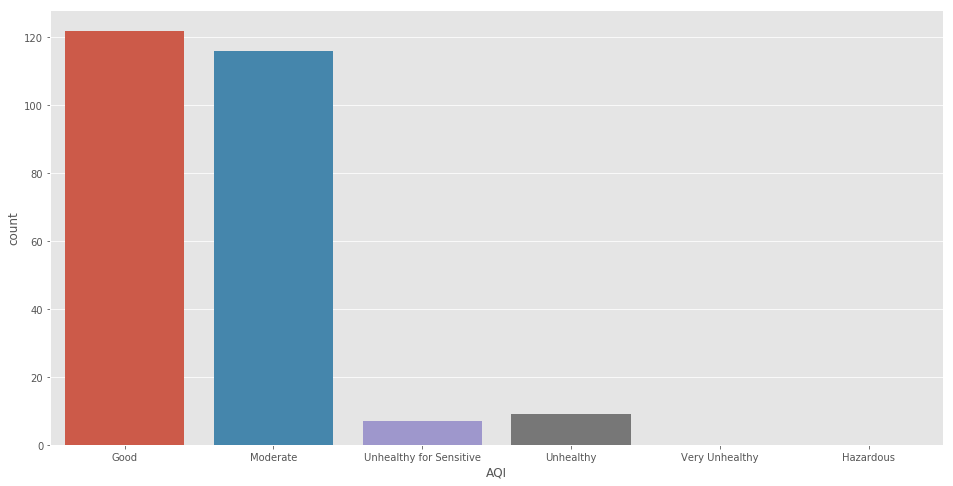

In [154]:
sns.countplot(merge['AQI'],label="Count")
plt.show()

# TRAINING AND TESTING 

In [107]:
X = merge[[ 'HUM', 'SPD', 'TEMP']]
y = merge['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.48
Accuracy of logistic regression classifier on test set: 0.44


# DecisionTreeClassifier


In [110]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
print('Accuracy of Decision Tree classifier on training set:{:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set:{:.2f}'
    .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set:0.99
Accuracy of Decision Tree classifier on test set:0.42


# KNeighborsClassifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
    .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.66
Accuracy of K-NN classifier on test set: 0.53


# Linear Discriminant Analysis

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
.format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
.format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.58
Accuracy of LDA classifier on test set: 0.44


# Gaussian Naive Bayes

In [149]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.50
Accuracy of GNB classifier on test set: 0.45


# Gaussian Process Classifier

In [116]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [145]:
kernel =1.0*RBF(1.0)
gpc= GaussianProcessClassifier(kernel=kernel,random_state=0).fit(X_test, y_test)
gpc.score(X_test, y_test)

0.890625

In [147]:
gpc= GaussianProcessClassifier()
gpc.fit(X_test, y_test)
gpc.score(X_test, y_test)

0.9375

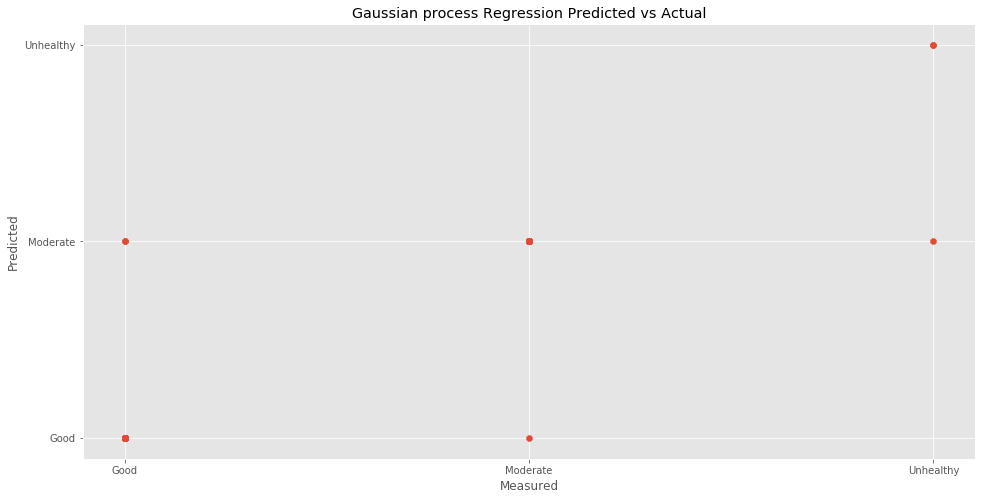

In [129]:
# Make predictions using the testing set
gpc_pred = gpc.predict(X_test)

plt.scatter(y_test, gpc_pred)
#sns.regplot(y_test,gpr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Gaussian process Regression Predicted vs Actual')
plt.show()

# Support Vector Machine

In [131]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
.format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
.format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.78
Accuracy of SVM classifier on test set: 0.56


# Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import confusion_matrix

# Create Random Forrest Regressor object
cl_rf = RandomForestClassifier()
# Train the model using the training sets
print cl_rf.fit(X_train, y_train)

# Score the model
cl_rf_score = cl_rf.score(X_test, y_test)
cl_rf_score

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


0.53125

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, nnr_pred))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))